In [1]:
#Libraries

In [2]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import preprocessing
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Flatten,Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras.layers import Embedding,SimpleRNN

In [3]:
#Numpy implementation of a simple RNN__understand RNN

In [4]:
import numpy as np
timesteps=100
input_features=32
output_features=64
inputs=np.random.random((timesteps,input_features))
state_t=np.zeros((output_features,))
W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))

In [5]:
successive_outputs=[]
for input_t in inputs:
    output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
    successive_outputs.append(output_t)
    state_t=output_t
final_output_sequence=np.concatenate(successive_outputs, axis=0)

In [6]:
#Batch size in SRNN


In [7]:
#A recurrent layer in Keras
# 'There is one minor difference: SimpleRNN process batches of sequences,like all other
# keras layers, not a single sequence as in the Numpy example.This means it takes inputs of shape 
#(batch_size,timesteps,input_features),rather than (timesteps, input_features).

In [8]:
#Simple RNN architect

In [9]:
#----simple RNN

In [10]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
#It's sometimes useful to stack several recurrent layers one after the other
# in order to increase the representational power of a network.In such a setup,you have 
#to get all of the intermediate layers to return full sequence of outputs:

In [12]:
##example shown below

In [13]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Data

In [15]:
#preparing the IMDB data

In [16]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [17]:
max_features=10000
maxlen=500
batch_size=32

In [18]:
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)

In [19]:
print(len(input_train),'train sequences')#25k
print(len(input_train), 'test sequences')#25k

25000 train sequences
25000 test sequences


In [20]:
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:',input_train.shape)#25k,500
print('input_test shape:',input_test.shape)#25k,500

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [21]:
#training the model with Embedding and SimpleRNN layers

In [22]:
from keras.layers import Dense
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [23]:
history=model.fit(input_train,y_train),
epochs=5,
batch_size=128,
validation_split=0.2


782/782 [==============================] - 121s 151ms/step - loss: 0.4709 - acc: 0.7733


In [24]:
#implement

In [25]:
history=model.fit(input_train,y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 32s 207ms/step - loss: 0.3012 - acc: 0.8777 - val_loss: 0.3076 - val_acc: 0.8780
Epoch 2/5
157/157 [==============================] - 33s 207ms/step - loss: 0.2550 - acc: 0.9039 - val_loss: 0.3645 - val_acc: 0.8724
Epoch 3/5
157/157 [==============================] - 33s 209ms/step - loss: 0.2308 - acc: 0.9137 - val_loss: 0.3610 - val_acc: 0.8404
Epoch 4/5
157/157 [==============================] - 32s 203ms/step - loss: 0.1984 - acc: 0.9286 - val_loss: 0.3058 - val_acc: 0.8732
Epoch 5/5
157/157 [==============================] - 31s 200ms/step - loss: 0.1795 - acc: 0.9335 - val_loss: 0.3890 - val_acc: 0.8558


In [26]:
#Accuracy

In [27]:
#plotting results

In [28]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

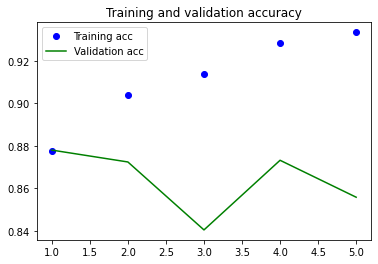

In [29]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [30]:
#loss

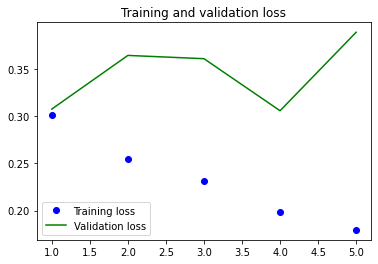

In [51]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
##LSTM

In [33]:
#_____EXPERIMENTNUSING THE LSTM LAYER IN KERAS

In [34]:
from keras.layers import LSTM
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

In [46]:
history=model.fit(input_train,y_train,epochs=5,
                  batch_size=128,validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 78s 478ms/step - loss: 0.4975 - acc: 0.7688 - val_loss: 0.3410 - val_acc: 0.8632
Epoch 2/5
157/157 [==============================] - 75s 479ms/step - loss: 0.3080 - acc: 0.8756 - val_loss: 0.3135 - val_acc: 0.8696
Epoch 3/5
157/157 [==============================] - 76s 484ms/step - loss: 0.2363 - acc: 0.9114 - val_loss: 0.2840 - val_acc: 0.8804
Epoch 4/5
157/157 [==============================] - 77s 493ms/step - loss: 0.2056 - acc: 0.9232 - val_loss: 0.3075 - val_acc: 0.8862
Epoch 5/5
157/157 [==============================] - 78s 496ms/step - loss: 0.1798 - acc: 0.9345 - val_loss: 0.2960 - val_acc: 0.8906


In [36]:
#LSTM

In [42]:
#from keras.layers import LSTM
#model=Sequential()
#model.add(Embedding(max_features,32))
#model.add(LSTM(32))
#model.add(Dense(1,activation='sigmoid'))
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',
             # metrics=['acc'])

In [43]:
#Accuracy

In [47]:
import matplotlib.pyplot as plt
acc1=history.history['acc']
val_acc1=history.history['val_acc']
loss1=history.history['loss']
val_loss1=history.history['val_loss']
epochs1=range(1,len(acc)+1)

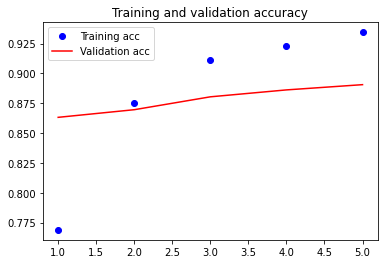

In [48]:
plt.plot(epochs1,acc1,'bo',label='Training acc')
plt.plot(epochs1,val_acc1,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [49]:
#Loss

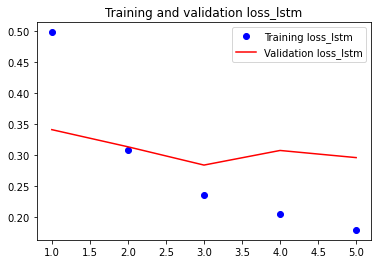

In [50]:
plt.plot(epochs1,loss1,'bo',label='Training loss_lstm')
plt.plot(epochs1,val_loss1,'r',label='Validation loss_lstm')
plt.title('Training and validation loss_lstm')
plt.legend()
plt.show()